# Hipótesis 1:

### "Las provincias con una edad media menor y una renta media por hogar mayor, suelen estar más concienciadas con el uso de energías renovables y utilizan más dispositivos que aprovechan este tipo de energía."

La justificación de esta hipótesis radica en que las personas jóvenes suelen estar más concienciadas con el medio ambiente, además de que tienen más tiempo para amortizar la inversión de este tipo de tecnología a lo largo de su vida.

<br>

### Preparación del entorno

In [676]:
# Librerías
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm  
import numpy as np
from sklearn import preprocessing 
import os 
import scipy
import seaborn as sns
import plotly.express as px
from sklearn.metrics import DistanceMetric
from sklearn import metrics
from scipy import cluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go

# Rutas
GOLD_DATA_PATH = os.path.join("..", "..", "data/gold/")

<br>

### Datos

Primero, cargamos el dataset correspondiente a la tarjeta de datos 1.

In [677]:
h1_df=pd.read_csv(GOLD_DATA_PATH+"data_card_1_df.csv", sep = ";", encoding = "latin")
h1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 5 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Provincias                                                   47 non-null     object 
 1   Población Total                                              47 non-null     int64  
 2   Renta media por hogar                                        47 non-null     int64  
 3   Edad media                                                   47 non-null     float64
 4   Porcentaje de hogares con dispositivos de energía renovable  47 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.0+ KB


In [678]:
# Ejemplo de los datos que presenta la tabla
h1_df.head(5)

,Provincias,Población Total,Renta media por hogar,Edad media,Porcentaje de hogares con dispositivos de energía renovable
0,Albacete,385727,30908,43.677523,4.314062
1,Alicante/Alacant,1901594,28965,43.766889,4.036060
2,Almería,740534,28442,40.320448,6.713842
3,Araba/Álava,334412,38586,44.565691,10.445424
4,Asturias,1004686,33242,48.683390,5.031368


Visualizamos los datos.

In [679]:
fig = px.scatter_3d(h1_df, x='Renta media por hogar', y='Edad media', 
                    z='Porcentaje de hogares con dispositivos de energía renovable')
fig.show()

<br>

### Correlación de variables

Para analizar los datos, nos interesan los coeficientes que muestren una correlación fuerte.

In [680]:
columns = h1_df.columns[1:]
crr_results = []

for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        col1 = columns[i]
        col2 = columns[j]

        # Calculate Pearson correlation
        pearson = scipy.stats.pearsonr(h1_df[col1], h1_df[col2])
        pearson_corr = pearson[0]
        pearson_pval = pearson[1]
        
        # Calculate Spearman correlation
        spear = scipy.stats.spearmanr(h1_df[col1], h1_df[col2])
        spear_corr = spear.correlation
        spear_pval = spear.pvalue

            
        # Save results
        crr_results.append({
            'Feature 1': col1,
            'Feature 2': col2,
            'Pearson Correlation': pearson_corr,
            'Pearson p-value': pearson_pval,
            'Spearman Correlation': spear_corr,
            'Spearman p-value': spear_pval
        })


crr_results_df = pd.DataFrame(crr_results)
crr_results_df.head(10)

,Feature 1,Feature 2,Pearson Correlation,Pearson p-value,Spearman Correlation,Spearman p-value
0,Población Total,Renta media por hogar,0.499812,0.000348,0.192183,0.195608
1,Población Total,Edad media,-0.350727,0.015647,-0.535037,0.000107
2,Población Total,Porcentaje de hogares con dispositivos de ener...,0.213060,0.150462,0.207447,0.161765
3,Renta media por hogar,Edad media,-0.164277,0.269846,-0.113205,0.448667
4,Renta media por hogar,Porcentaje de hogares con dispositivos de ener...,0.254432,0.084373,0.312905,0.032234
5,Edad media,Porcentaje de hogares con dispositivos de ener...,-0.444344,0.001754,-0.511101,0.000241


Nos centraremos en la fila 5 de la tabla de correlaciones. 
- Correlación de Pearson:
    - Valor de la correlación de Pearson: -0.444344.
        - El valor de la correlación de Pearson es negativo, lo que sugiere una relación inversa entre la edad media y el porcentaje de hogares con dispositivos de energía renovable. En otras palabras, cuando uno de estos valores aumenta, el otro tiende a disminuir.
        - El valor de la correlación de -0.444344 indica que hay una relación negativa moderada entre estas dos características.

    - Valor p de Pearson: 0.001754.
        - El valor p asociado con la correlación de Pearson es muy bajo (menor que 0.05), lo que sugiere que esta correlación es estadísticamente significativa. Es decir, la relación observada probablemente no sea aleatoria.

- Correlación de Spearman:
    - Valor de la correlación de Spearman: -0.511101.
        - La correlación de Spearman también es negativa, pero un poco más fuerte que la de Pearson.
        - Este valor también sugiere que conforme aumenta la edad media, tiende a disminuir el porcentaje de hogares con dispositivos de energía renovable.


    - Valor p de Spearman: 0.000241.
        - Al igual que el valor p de Pearson, el valor p de Spearman es extremadamente bajo, lo que indica que la correlación observada es estadísticamente significativa. Esto refuerza la conclusión de que existe una relación no aleatoria entre estas dos variables.

Crearemos una gráfica para ilustrar la correlación entre estas dos variables. Esto nos permitirá visualizar cómo están relacionadas entre sí.

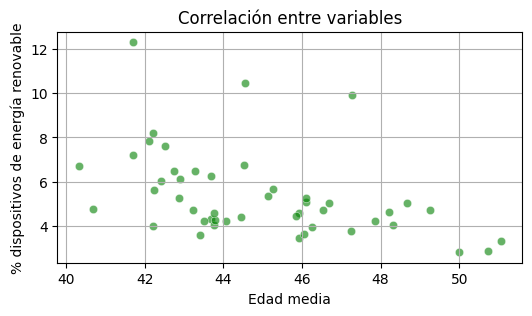

In [681]:
plt.figure(figsize=(6, 3))
sns.scatterplot(data=h1_df, x='Edad media', y='Porcentaje de hogares con dispositivos de energía renovable', color='green', alpha=0.6)
plt.title('Correlación entre variables')
plt.xlabel('Edad media')
plt.ylabel('% dispositivos de energía renovable')
plt.grid(True)
plt.show()

##### Conclusiones

Mediante el estudio de correlación, hemos confirmado que existe una relación negativa moderada entre la edad media y el porcentaje de hogares con dispositivos de energía renovable. Esto nos acerca a validar nuestra hipótesis, ya que hemos observado que el porcentaje de dispositivos de energía renovable tiende a aumentar a medida que disminuye la edad media.

Sin embargo, aún no hemos terminado. Debemos tener en cuenta la renta media, pero la correlación entre variables no nos aporta información relevante al respecto.

<br>

### Transformaciones previas

Aplicaremos RobustScaler a nuestros datos. Este escalador elimina la mediana y escala los datos según el rango de cuartiles (el valor predeterminado es RIQ: rango intercuartil).
<br>
Esto puede distorsionar un poco los datos, pero suele ayudar a obtener mejores resultados en técnicas de clustering.

In [682]:
h1_df.drop('Población Total', axis=1, inplace=True)

In [683]:
h1_df.head()

,Provincias,Renta media por hogar,Edad media,Porcentaje de hogares con dispositivos de energía renovable
0,Albacete,30908,43.677523,4.314062
1,Alicante/Alacant,28965,43.766889,4.036060
2,Almería,28442,40.320448,6.713842
3,Araba/Álava,38586,44.565691,10.445424
4,Asturias,33242,48.683390,5.031368


In [684]:
scaler = preprocessing.RobustScaler()
datanorm = scaler.fit_transform(h1_df.iloc[:, 1:])

Graficamos los datos normalizados.

In [685]:
x = datanorm[:,0]
y = datanorm[:,1]
z = datanorm[:,2]

fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,  mode='markers')])
fig.show()

<br>

### Modelado

#### a) Clustering Jerárquico

El clustering jerárquico organiza los datos en una estructura de árbol llamada dendrograma, que muestra cómo se relacionan los clusters entre sí. La raíz del árbol representa todos los elementos, mientras que las hojas corresponden a los grupos con mayor similitud. Los niveles intermedios reflejan la fusión o división de los clusters en diferentes etapas.

Similarity matrix.

In [686]:
dist = DistanceMetric.get_metric('euclidean')
matsim = dist.pairwise(datanorm)

fig = px.imshow(matsim)
fig.show()

Dendrogram.

Una vez calculada la matriz de similitud, pasamos a construir el dendrograma. Para ello, se ha seleccionado el método Ward, que emplea el algoritmo de minimización de varianza de Ward. La nueva entrada d(u,v) se calcula de la siguiente manera:

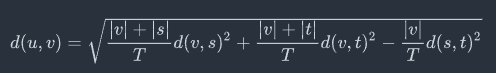

Para más información sobre cluster.hierarchy.linkage ver [aquí](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html).

C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_1380\2858820463.py:2: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



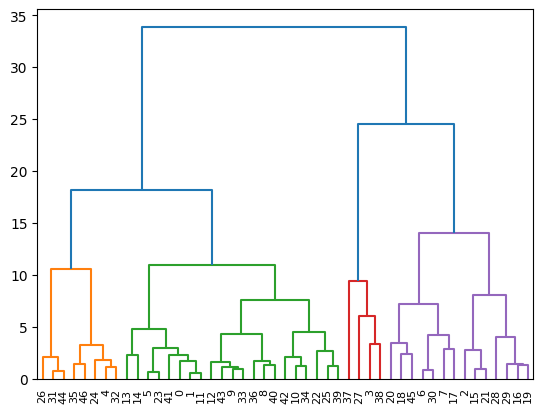

<Figure size 640x480 with 0 Axes>

In [687]:
# métodos posibles ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']
clusters = cluster.hierarchy.linkage(matsim, method = 'ward')
cluster.hierarchy.dendrogram(clusters, color_threshold=18, labels = h1_df.index)
f = plt.figure()
plt.show()

Se han probado los diferentes métodos ('single', 'complete', 'average'...). Sin embargo, el método 'complete' genera 2 grupos y 'ward' crea 4. Los demás métodos clasifican todos los datos en un solo grupo. Por esta razón, se ha decidido utilizar el método Ward para el cálculo de la distancia entre los clusters.

El resultado del clustering jerárquico muestra que los datos se han dividido en 4 grupos.

In [688]:
cut = 16 # !!!! ad-hoc
labels = cluster.hierarchy.fcluster(clusters, cut , criterion = 'distance')

labels

array([2, 2, 4, 3, 1, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4,
       2, 2, 1, 2, 1, 3, 4, 4, 4, 1, 1, 2, 2, 1, 2, 3, 3, 2, 2, 2, 2, 2,
       1, 4, 1], dtype=int32)

Ahora pasamos a interpretar los resultados obtenidos del clustering y a aplicar métricas de calidad para evaluar la efectividad de la agrupación.

Silhouette Coefficient.

In [689]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(datanorm, labels))

Estimated number of clusters: 4
Silhouette Coefficient: 0.254


Conclusión: (valor cercano a 0) los puntos están en la frontera entre dos grupos. No es claro a qué grupo pertenecen, lo que indica que la calidad del clustering no es alta.

Visualizamos el resultado.

In [690]:
fig = px.scatter_3d(h1_df, x='Renta media por hogar', y='Edad media', 
                    z='Porcentaje de hogares con dispositivos de energía renovable', color = labels)
fig.show()

Añadimos los grupos al dataset original como una nueva columna.

In [691]:
h1_df['Labels_CJ'] = labels
h1_df.head()

,Provincias,Renta media por hogar,Edad media,Porcentaje de hogares con dispositivos de energía renovable,Labels_CJ
0,Albacete,30908,43.677523,4.314062,2
1,Alicante/Alacant,28965,43.766889,4.036060,2
2,Almería,28442,40.320448,6.713842,4
3,Araba/Álava,38586,44.565691,10.445424,3
4,Asturias,33242,48.683390,5.031368,1


Dibujamos un gráfico de barras para cada característica con el objetivo de interpretar y ver el objetivo de cada grupo.

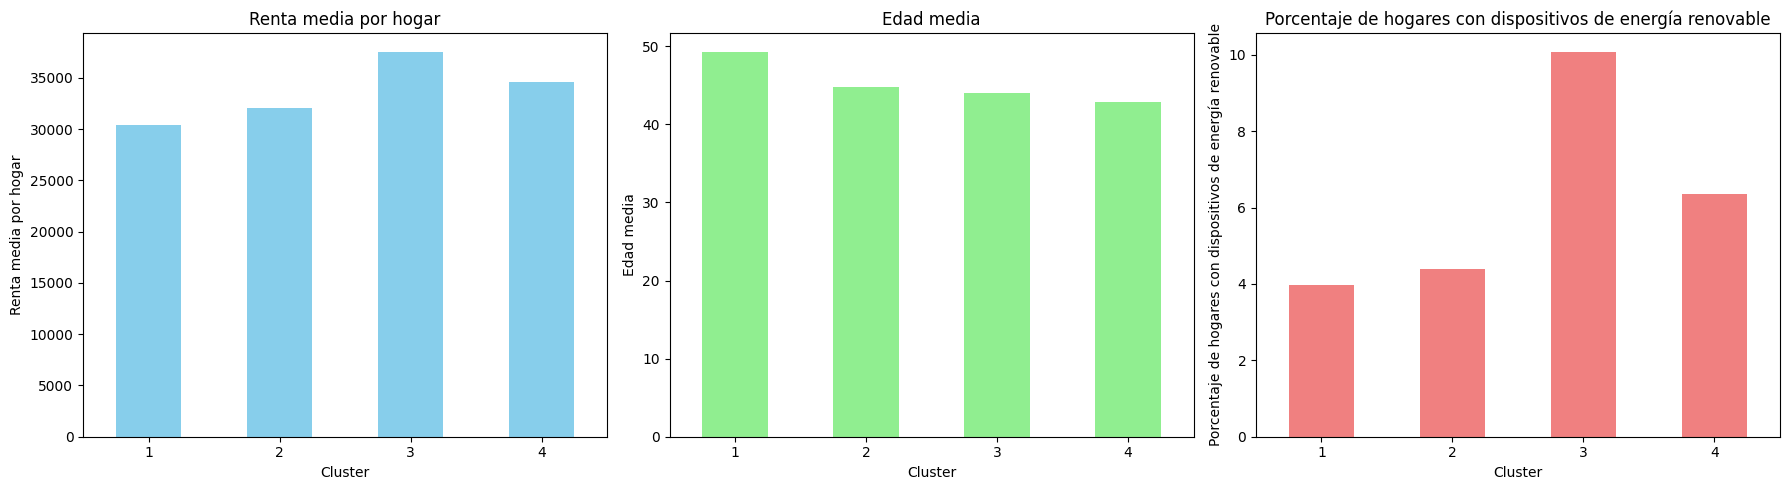

In [692]:
# Agrupar por 'Labels_CJ' y calcular la media para cada característica
grouped = h1_df.groupby('Labels_CJ').agg({
    'Renta media por hogar': 'mean',
    'Edad media': 'mean',
    'Porcentaje de hogares con dispositivos de energía renovable': 'mean'
})

# Características a graficar
columns_to_plot = ['Renta media por hogar', 'Edad media', 'Porcentaje de hogares con dispositivos de energía renovable']

# Crear los subplots (3 gráficos en 1 fila)
fig, ax = plt.subplots(1, len(columns_to_plot), figsize=(18, 5))

# Iterar sobre las columnas y generar los gráficos
for i, col in enumerate(columns_to_plot):
    grouped[col].plot(kind='bar', ax=ax[i], color='skyblue' if col == 'Renta media por hogar' else ('lightgreen' if col == 'Edad media' else 'lightcoral'))
    ax[i].set_title(col)
    ax[i].set_xlabel('Cluster')
    ax[i].set_ylabel(col)
    ax[i].set_xticklabels(grouped.index, rotation=0)

# Ajustar la disposición del gráfico para que no se solapen los títulos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Representamos los grupos en un mapa de España para analizar si existe alguna relación geográfica entre ellos.

In [693]:
# Generamos un dataset con la forma de (Provincia, Cluster)
cluster_hierarchy_results = h1_df[['Provincias', 'Labels_CJ']]

# Guardar el nuevo dataset
cluster_hierarchy_results.to_csv('cluster_hierarchy_results.csv', index=False)

#### Conclusiones

Los resultados muestran que el cluster 3 tiene el mayor porcentaje de hogares con dispositivos de energía renovable, además de ser el grupo con la renta media más alta y el segundo con una edad media más baja. Este hallazgo sugiere que, en este grupo, existe una relación positiva entre una mayor renta y un mayor nivel de adopción de tecnologías renovables. Además, el hecho de que este cluster sea el segundo con la edad media más baja refuerza la idea de que un perfil de población joven y con mayor poder adquisitivo tiende a estar más involucrado con el uso de energías renovables.

Por otro lado, el cluster 1 es el que presenta el menor porcentaje de hogares con dispositivos de energía renovable. Además, este cluster es el que tiene la renta media más baja y la edad media más alta. Estos resultados sugieren que las provincias con menos recursos económicos y una población más envejecida muestran menor inclinación hacia la adopción de tecnologías basadas en energías renovables.

<br>

#### b) K-Means Clustering

El algoritmo k-means agrupa puntos en clústeres alrededor de centroides, que son puntos representativos de cada grupo. A través de un proceso iterativo, asigna cada punto al clúster más cercano, minimizando la distancia entre los puntos y sus centroides para optimizar la agrupación.

Para determinar el número óptimo de grupos, se utilizará el método del codo (Elbow Method). Este método nos indica la ganancia que se obtiene al hacer n clusters. El objetivo es buscar el punto óptimo ganancia/clusters.

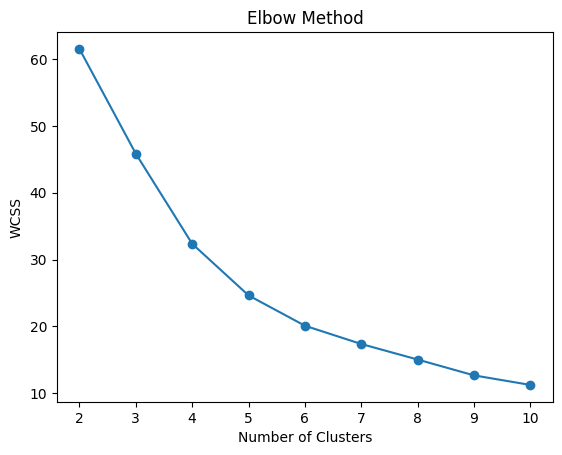

In [694]:
wcss = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(datanorm)
    wcss.append(kmeans.inertia_)

# Se dibuja la gráfica
plt.plot(range(2, 11), wcss, marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Entrenamos el modelo.

In [695]:
k = 4 # grupos

# Se entrena el modelo
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_km = kmeans.fit_predict(datanorm)

Calculamos las métricas del algoritmo.

In [696]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(datanorm, y_km))
      
print('Distortion: %.2f' % kmeans.inertia_)

Silhouette Coefficient: 0.318
Distortion: 32.35


Visualizamos el resultado.

In [697]:
fig = px.scatter_3d(h1_df, x='Renta media por hogar', y='Edad media', 
                    z='Porcentaje de hogares con dispositivos de energía renovable', color = kmeans.labels_)
fig.show()

Añadimos los grupos al dataset original como una nueva columna.

In [698]:
h1_df['Labels_KM'] = kmeans.labels_
h1_df.head()

,Provincias,Renta media por hogar,Edad media,Porcentaje de hogares con dispositivos de energía renovable,Labels_CJ,Labels_KM
0,Albacete,30908,43.677523,4.314062,2,2
1,Alicante/Alacant,28965,43.766889,4.036060,2,2
2,Almería,28442,40.320448,6.713842,4,2
3,Araba/Álava,38586,44.565691,10.445424,3,1
4,Asturias,33242,48.683390,5.031368,1,0


Dibujamos un gráfico de barras para cada característica con el objetivo de interpretar y ver el objetivo de cada grupo.

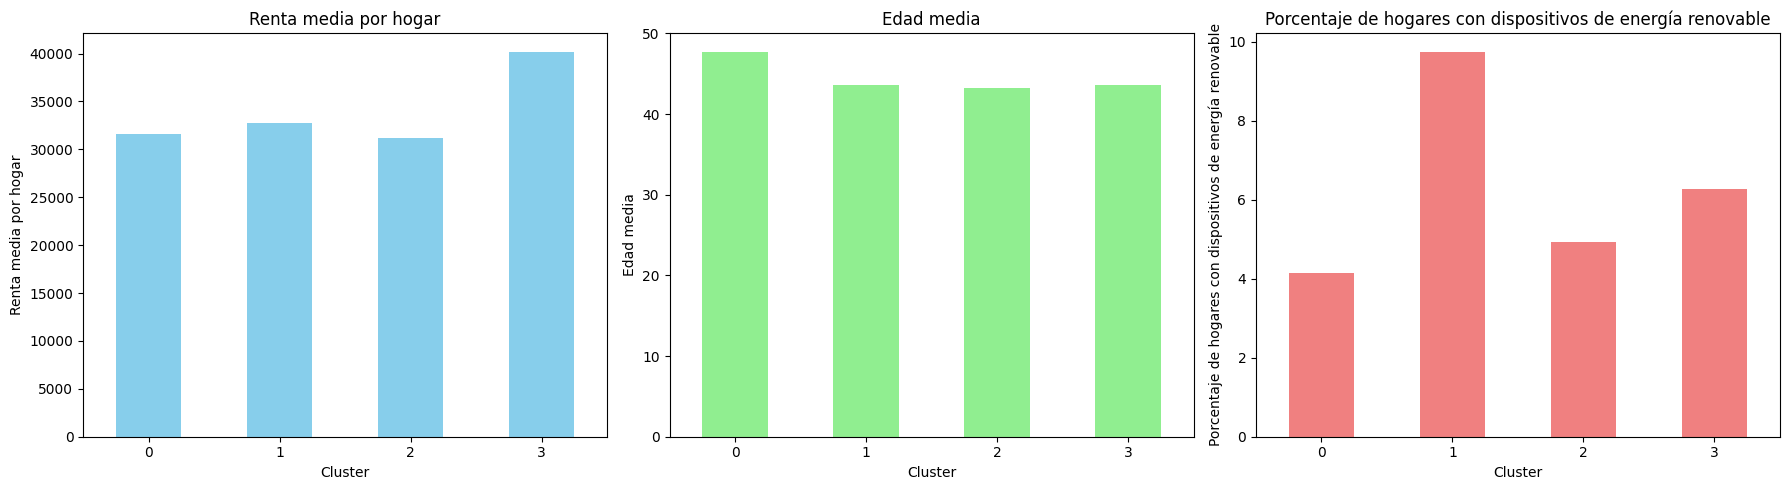

In [699]:
# Agrupar por 'Labels_KM' y calcular la media para cada característica
grouped = h1_df.groupby('Labels_KM').agg({
    'Renta media por hogar': 'mean',
    'Edad media': 'mean',
    'Porcentaje de hogares con dispositivos de energía renovable': 'mean'
})

# Características a graficar
columns_to_plot = ['Renta media por hogar', 'Edad media', 'Porcentaje de hogares con dispositivos de energía renovable']

# Crear los subplots (3 gráficos en 1 fila)
fig, ax = plt.subplots(1, len(columns_to_plot), figsize=(18, 5))

# Iterar sobre las columnas y generar los gráficos
for i, col in enumerate(columns_to_plot):
    grouped[col].plot(kind='bar', ax=ax[i], color='skyblue' if col == 'Renta media por hogar' else ('lightgreen' if col == 'Edad media' else 'lightcoral'))
    ax[i].set_title(col)
    ax[i].set_xlabel('Cluster')
    ax[i].set_ylabel(col)
    ax[i].set_xticklabels(grouped.index, rotation=0)

# Ajustar la disposición del gráfico para que no se solapen los títulos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Representamos los grupos en un mapa de España para analizar si existe alguna relación geográfica entre ellos.

In [700]:
# Generamos un dataset con la forma de (Provincia, Cluster)
k_means_results = h1_df[['Provincias', 'Labels_KM']]

# Guardar el nuevo dataset
k_means_results.to_csv('k_means_results.csv', index=False)

#### Conclusiones

El cluster 0 tiene el menor porcentaje de hogares con dispositivos de energía renovable en promedio y es el grupo con la edad media más alta. Esto podría ser útil para responder a nuestra hipótesis, pero la diferencia en la edad media entre los distintos clusters es mínima, siendo casi nula entre los clusters 1, 2 y 3.

Por otro lado, el cluster 1 tiene el mayor porcentaje de hogares con dispositivos de energía renovable y una edad media ligeramente menor que el cluster 0 (aunque la diferencia es pequeña). En cuanto a la renta media, no es el cluster con mayor renta, y su valor es muy similar al del cluster 0.

En resumen, este clustering no nos proporciona información clara o suficiente para confirmar o refutar nuestra hipótesis.

<br>

## Resultados

Nos centraremos en los resultados obtenidos en el clustering jerárquico.

❓❓❓